In [1]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col,desc
from pyspark.sql.types import StructType
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt

#Create SparkSession
spark = SparkSession.builder.appName('SparkByExamples.com').getOrCreate()

In [2]:
df = spark.read.format("csv")\
                    .option("inferSchema","true")\
                    .option("multiLine","true")\
                    .option("header","true")\
                    .load("SampleProduct.csv")

In [3]:
df.show(3,vertical=True)

-RECORD 0--------------------------------------------------
 _id                                | 62e394a81bfab5651... 
 BasicInfo.alias                    | case-ipad-10-2-20... 
 BasicInfo.shopID                   | 192939               
 BasicInfo.Category.parent.name     | Handphone & Tablet   
 BasicInfo.Category.child.name      | Aksesoris Tablet     
 BasicInfo.Category.grandchild.name | Casing & Cover Ta... 
 BasicInfo.txStats.countSold        | 0                    
 product_content.price.value        | 232002               
-RECORD 1--------------------------------------------------
 _id                                | 62e394a81bfab5651... 
 BasicInfo.alias                    | case-xiaomi-mi-pa... 
 BasicInfo.shopID                   | 192939               
 BasicInfo.Category.parent.name     | Handphone & Tablet   
 BasicInfo.Category.child.name      | Aksesoris Handphone  
 BasicInfo.Category.grandchild.name | Soft Case Handphone  
 BasicInfo.txStats.countSold        | 13

In [4]:
df_alias = (df
       .withColumnRenamed('BasicInfo.alias','Product_name')
       .withColumnRenamed('BasicInfo.shopID', 'Shop_ID')
       .withColumnRenamed('BasicInfo.Category.parent.name','Category_name')
       .withColumnRenamed('BasicInfo.Category.child.name','SubCat_name')
       .withColumnRenamed('BasicInfo.Category.grandchild.name','SubCat2_name')
       .withColumnRenamed('BasicInfo.txStats.countSold','Product_sold')
       .withColumnRenamed('product_content.price.value','Price')
       )

In [5]:
df_alias.count()

4356226

In [6]:
df_alias= df_alias.withColumn("Price",col("Price").cast("Integer"))\
                  .withColumn("Product_sold",col("Product_sold").cast("Integer"))

In [7]:
df_fix = df_alias.filter((df_alias.Product_sold > "0")) 

In [8]:
df_fix.count()

1681200

In [9]:
#groupByCategory
df2 = df_fix.groupBy("Category_name")\
              .count()\
              .orderBy('count',ascending=False)
df2.show(150)

+--------------------+------+
|       Category_name| count|
+--------------------+------+
|       Mainan & Hobi|163693|
|      Fashion Wanita|119775|
|            Otomotif|115977|
|        Rumah Tangga|102047|
|        Fashion Pria|101746|
|          Elektronik| 91460|
|  Handphone & Tablet| 89424|
|            Olahraga| 81429|
|          Kecantikan| 77043|
|                Buku| 76726|
|           Kesehatan| 72416|
|   Komputer & Laptop| 69556|
|               Dapur| 63043|
|   Makanan & Minuman| 59418|
|         Pertukangan| 58911|
|     Perawatan Tubuh| 57380|
|Perlengkapan Pest...| 50710|
| Fashion Anak & Bayi| 44790|
| Office & Stationery| 41323|
|          Ibu & Bayi| 32280|
|      Produk Lainnya| 22461|
|      Fashion Muslim| 19426|
|                null| 18931|
|              Kamera| 16891|
|     Perawatan Hewan| 13165|
|        Film & Musik| 12983|
|              Gaming|  6904|
|         Logam Mulia|  1075|
|       Tour & Travel|   138|
|            Properti|    54|
|         

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt

In [11]:
dataframe = df2.toPandas()
bar = dataframe.head(10)

In [12]:
label = bar['Category_name']

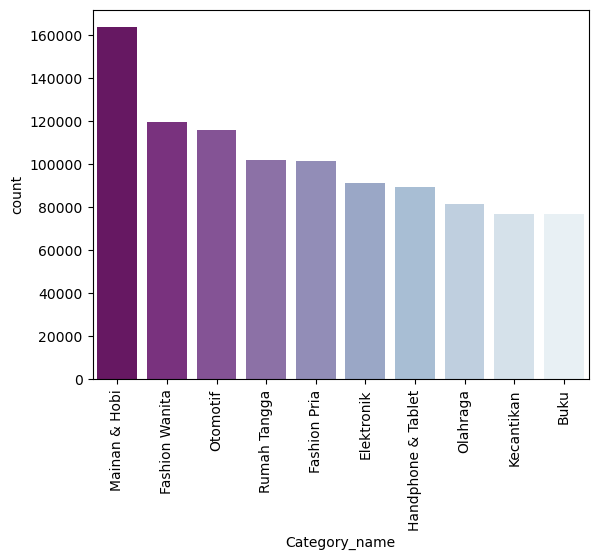

In [13]:
g = sns.barplot(data=bar, x="Category_name", y="count",palette="BuPu_r")
g.set_xticklabels(labels=label, rotation=90)
# plt.figure(figsize=(30, 15))
plt.show()

In [14]:
df_makanan = df_alias.filter((df_alias.Category_name == "Handphone & Tablet" )) 
df_makanan.show(2,vertical=True)

-RECORD 0-----------------------------
 _id           | 62e394a81bfab5651... 
 Product_name  | case-ipad-10-2-20... 
 Shop_ID       | 192939               
 Category_name | Handphone & Tablet   
 SubCat_name   | Aksesoris Tablet     
 SubCat2_name  | Casing & Cover Ta... 
 Product_sold  | 0                    
 Price         | 232002               
-RECORD 1-----------------------------
 _id           | 62e394a81bfab5651... 
 Product_name  | case-xiaomi-mi-pa... 
 Shop_ID       | 192939               
 Category_name | Handphone & Tablet   
 SubCat_name   | Aksesoris Handphone  
 SubCat2_name  | Soft Case Handphone  
 Product_sold  | 13                   
 Price         | 328002               
only showing top 2 rows



In [15]:
df3 = df_makanan.groupBy("SubCat_name")\
              .count()\
              .orderBy('count',ascending=False)
df3.show(150)

+--------------------+------+
|         SubCat_name| count|
+--------------------+------+
| Aksesoris Handphone|161794|
|  Komponen Handphone| 41145|
|           Handphone| 31326|
|    Wearable Devices| 16014|
|    Aksesoris Tablet| 13658|
|          Power Bank|  6979|
|Nomor Perdana & V...|  3597|
|              Tablet|  2072|
|     Komponen Tablet|   406|
+--------------------+------+



In [16]:
df_submakanan = df_alias.filter((df_alias.SubCat_name == "Material Bangunan")) 
df_submakanan.show(30,vertical=True)

-RECORD 0-----------------------------
 _id           | 62e3973594c1bad1d... 
 Product_name  | papan-nama-ukiran... 
 Shop_ID       | 101                  
 Category_name | Pertukangan          
 SubCat_name   | Material Bangunan    
 SubCat2_name  | Kayu                 
 Product_sold  | 0                    
 Price         | 80000                
-RECORD 1-----------------------------
 _id           | 62e3994194c1bad1d... 
 Product_name  | kunci-jendela-elt... 
 Shop_ID       | 587                  
 Category_name | Pertukangan          
 SubCat_name   | Material Bangunan    
 SubCat2_name  | Jendela              
 Product_sold  | 23                   
 Price         | 45000                
-RECORD 2-----------------------------
 _id           | 62e3994494c1bad1d... 
 Product_name  | engsel-hinge-elt-... 
 Shop_ID       | 587                  
 Category_name | Pertukangan          
 SubCat_name   | Material Bangunan    
 SubCat2_name  | Engsel               
 Product_sold  | 10      

In [17]:
df4 = df_submakanan.groupBy("SubCat2_name")\
              .count()\
              .orderBy('count',ascending=False)
df4.show()

+------------+-----+
|SubCat2_name|count|
+------------+-----+
|Gagang Pintu| 6137|
|      Engsel| 1048|
|     Grendel|  813|
|       Kawat|  547|
|        Paku|  448|
|        Besi|  413|
|        Kayu|  380|
|        Kaca|  350|
| Kusen Pintu|  325|
|      Granit|  290|
|     Jendela|  225|
|        Batu|  217|
|        Baja|  195|
| Lantai Kayu|  168|
|       Tanah|  168|
|      Batako|   78|
|       Pasir|   72|
|       Beton|   56|
|     Genteng|   54|
|       Semen|   44|
+------------+-----+
only showing top 20 rows



In [18]:
df_label = df_alias.filter((df_alias.SubCat_name == "Alat Perkebunan")) 
df_label.show(5,vertical=True)

-RECORD 0-----------------------------
 _id           | 62e39cc094c1bad1d... 
 Product_name  | semprotan-air-1-l... 
 Shop_ID       | 2844                 
 Category_name | Pertukangan          
 SubCat_name   | Alat Perkebunan      
 SubCat2_name  | Alat Semprot Hama    
 Product_sold  | 0                    
 Price         | 12500                
-RECORD 1-----------------------------
 _id           | 62e39fb294c1bad1d... 
 Product_name  | hl-bottle-sprayer... 
 Shop_ID       | 1563                 
 Category_name | Pertukangan          
 SubCat_name   | Alat Perkebunan      
 SubCat2_name  | Alat Semprot Hama    
 Product_sold  | 2819                 
 Price         | 29500                
-RECORD 2-----------------------------
 _id           | 62e39fd894c1bad1d... 
 Product_name  | kenmaster-km-305-... 
 Shop_ID       | 1563                 
 Category_name | Pertukangan          
 SubCat_name   | Alat Perkebunan      
 SubCat2_name  | Alat Semprot Hama    
 Product_sold  | 432     

In [19]:
df_label.write.options(header='True', delimiter=',') \
 .csv("E:/SKRIPSI/Label/44Kebun.csv")

AnalysisException: path file:/E:/SKRIPSI/Label/44Kebun.csv already exists.

In [ ]:
cek = df_alias.filter((df_alias.Product_name).contains("kalkulator"))
cek.show(30,vertical=True)